In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv('IMDB.csv')
df=df[['index','titleType','startYear','runtimeMinutes','genres','averageRating','title','region','Description']]

In [3]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Senthil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [5]:
df["Description"]=df["Description"].apply(clean)

In [6]:
df=df.dropna(subset=['Description'])
df.head()

,index,titleType,startYear,runtimeMinutes,genres,averageRating,title,region,Description
0,0,movie,1991,118,"Crime,Drama,Thriller",8.6,The Silence of the Lambs,US,jodi foster star claric starl top student fbis...
1,1,movie,1991,137,"Action,Sci-Fi",8.6,Terminator 2: Judgment Day,US,sequel set eleven year termin young john conno...
2,3,movie,1994,88,"Adventure,Animation,Drama",8.5,The Lion King 3D,US,disney anim featur follow adventur young lion ...
3,4,movie,1994,154,"Crime,Drama",8.9,Pulp Fiction,US,vincent vega john travolta jule winnfield samu...
4,5,movie,1994,142,Drama,9.3,The Shawshank Redemption,US,andi dufresn tim robbin sentenc two consecut l...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature=df['Description'].tolist()
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf_vectorizer.fit_transform(feature)
similarity=cosine_similarity(tfidf_matrix)

In [8]:
indices=pd.Series(df['index'].tolist(),index=df['title'])

In [9]:
def movie_recommendation(title,similarity=similarity):
    i=indices[title]
    similarity_scores=list(enumerate(similarity[i]))
    similarity_scores=sorted(similarity_scores,key=lambda x:x[1],reverse=True)
    similarity_scores=similarity_scores[1:11]
    movieindices=[j[0] for j in similarity_scores]
    titles=df['title'].iloc[movieindices]
    return titles,similarity_scores

In [17]:
titles,similarity_scores=movie_recommendation("The Silence of the Lambs")

In [18]:
sim_scores=[]
for i in similarity_scores:
    sim_scores.append(i[1])

<Axes: ylabel='title'>

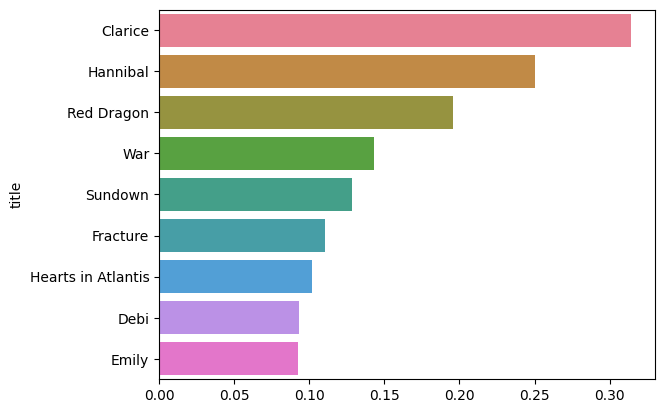

In [19]:
sns.barplot(x=sim_scores,y=titles,orient='h',hue=titles,palette='husl')